In [3]:
from src.visualization.vis import draw_mini_plots
from src.visualization.norms import visualize_norms
from src.visualization.test_loss import visualize_test_loss
from src.visualization.fractional_dimenstions import visualize_fractional_dimenstions
from src.evaluation import evaluate

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Задание

Воспроизвести статью [Antropic](https://transformer-circuits.pub/2023/toy-double-descent/index.html) о двойном спуске и суперпозиции.

Кратко:
- Изначально модель работает в режиме запоминания. Она запоминает высокоразмерные данные в виде отдельных точек в состоянии суперпозиции. В этом случае мы получаем маленький лосс на трейне и большой на тесте.
- С другой стороны модель может работать в режиме обобщения. В этом случае модель обобщает признаки водит их в состоянии суперпозиции. В этом случае имеем низкий лосс как на трейне так и на тесте.
- Между режимами запомпинания (мемоизации) и обобщения (генерализации) происходит скачок значения лосса, который и определяет границу перехода между ними.

Предлагается реализовать игрушечную модель (см. `/src/model.py`)

В статье утверждается, что модель должна находиться в режиме мемоизации в случае, когда размер обучающего набора меньше количества признаков, и в режиме генерализации, когда размер набора больше числа признаков.

### Параметры эксперимента

На вход модели подаются векторы признаков размерностью $n=10000$, отдельным признакам значения проставляются в вероятностью $S=0.001$, $\vert\vert x \vert\vert = 1$

#### Параметры обучения

В качестве оптимизатора берется $AdamW$, с величиной регуляризации $l_{2 reg}=10^{-2}$. Количество шагов обучения $50000$. Прогрев занимает $2500$ шагов $lr \in [0, 10^{-3}]$, затем по косинусу убывает до $0$. На каждом шаге обучения используется весь заготовленный батч с данными.

### Воспроизводимость экспериментов

Ознакомившись со статьей я воспроизвел предложенные эксперименты для модели с $m=2$. Полученные результаты согласуются с тем, что было представлено в статье. Я не стал воспроизводить эксперименты для больших $T$ из-за ограничения в ресурсах.

Визуализация признаков $3-30 (по\space порядку)$ и скрытых состояний при условии малых данных

In [4]:
T = [3, 5, 6, 10, 15, 30, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

/Users/ilyamikheev/Desktop/projects/selected-topics-ai/TOY-DOUBLE-DECENT/src/visualization/vis.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


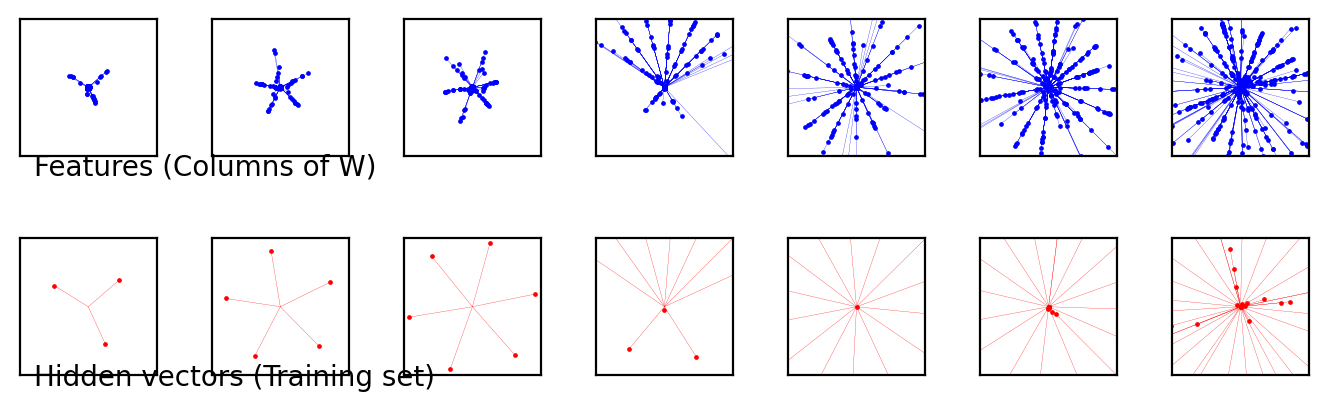

In [5]:
draw_mini_plots(T[:7])

In [9]:
weights_dict, train_hiddens_dict, test_losses_dict, test_hiddens_dict = evaluate(T)

16it [00:01, 14.88it/s]


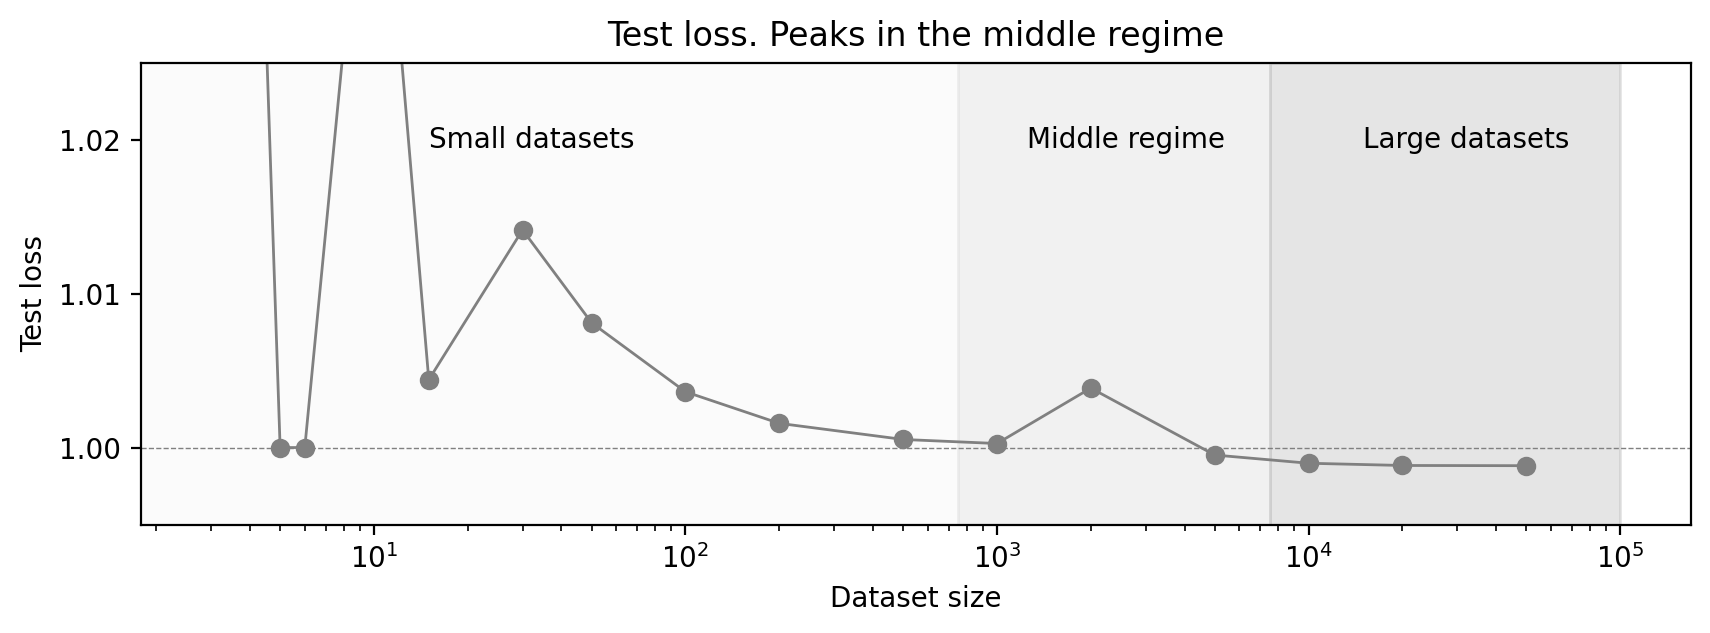

In [10]:
visualize_test_loss(T, test_losses_dict)

График лосса на тесте немного отличается от того, что представлено в статье, на малых данных у меня появляется еще один максимум, которого не  в оригинальной статье. Я пробовал запускать эксперимент несолько раз, но дополнительный гребень остается, возможно я что-то упустил.

В остальном значения тестового лосса согласуется с тем, что описано в статье.

100%|██████████| 16/16 [00:01<00:00, 14.40it/s]


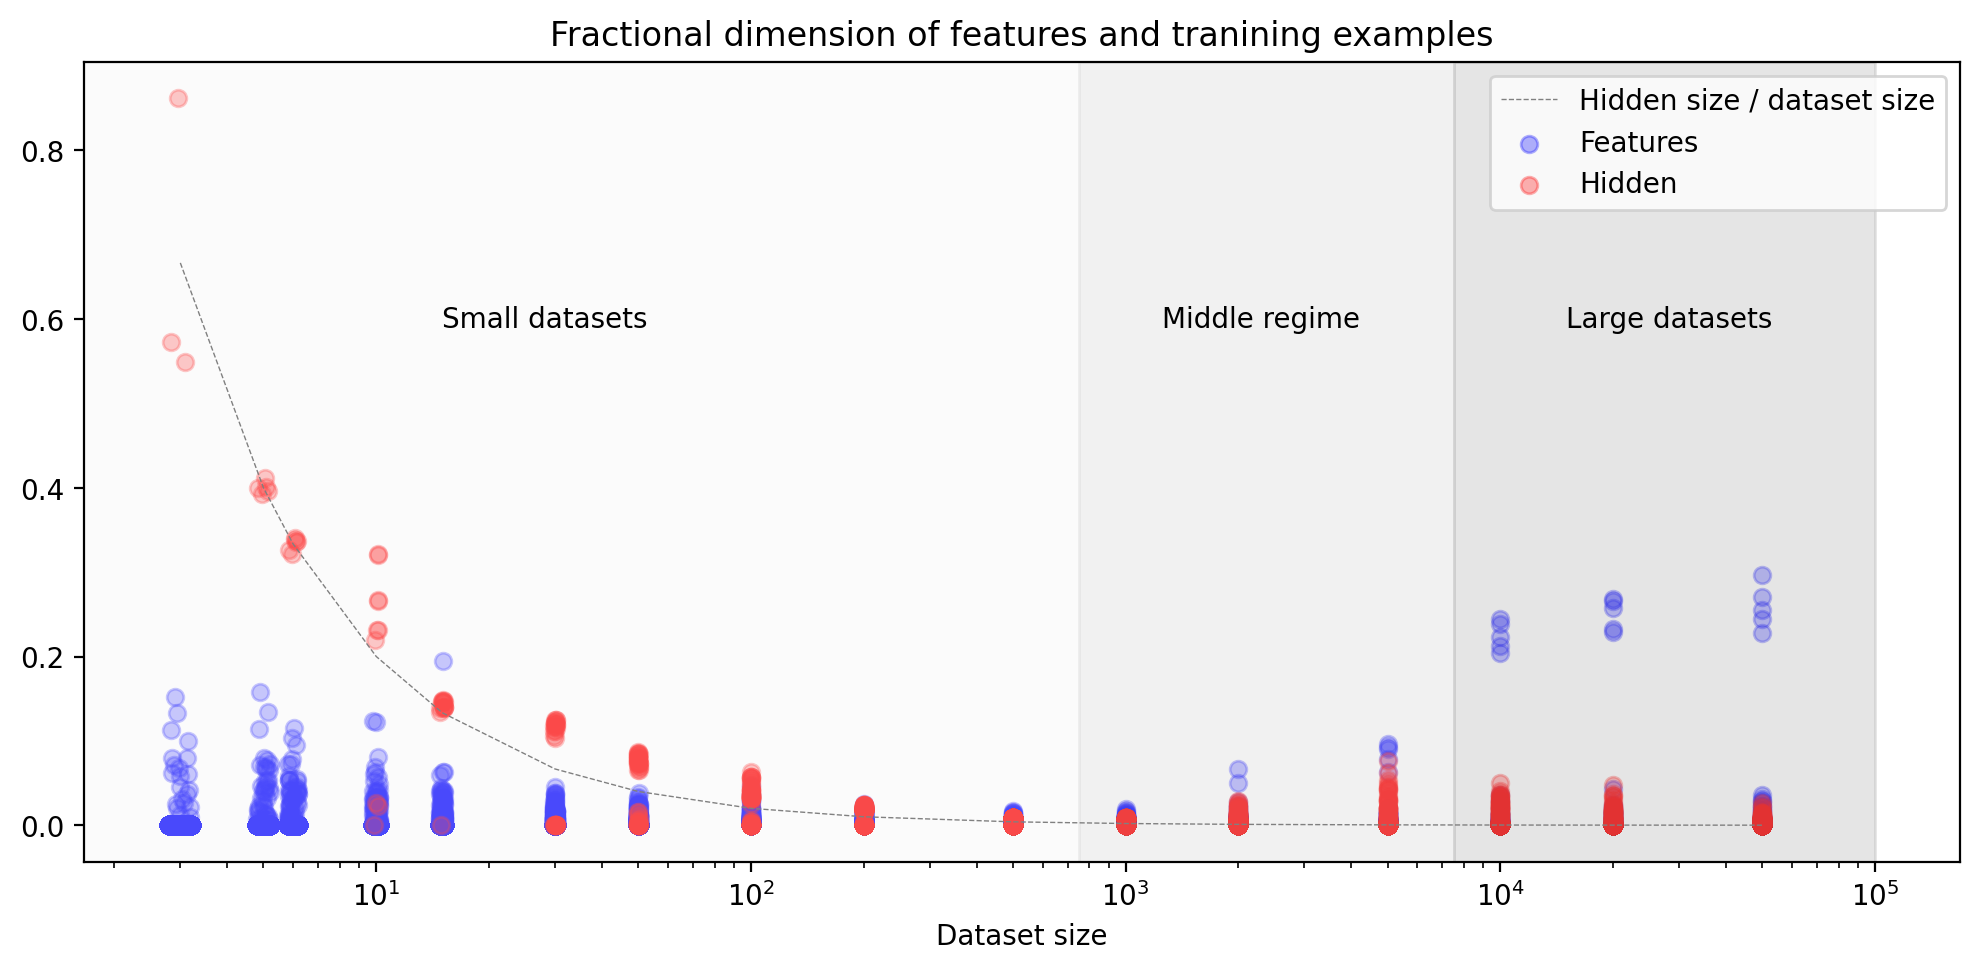

In [11]:
visualize_fractional_dimenstions(T, weights_dict, train_hiddens_dict)

Режим генерализации начался примерно с $T=5000$. Это можно заметить по образующемуся пятиугольнику как хиденах так и в дате.

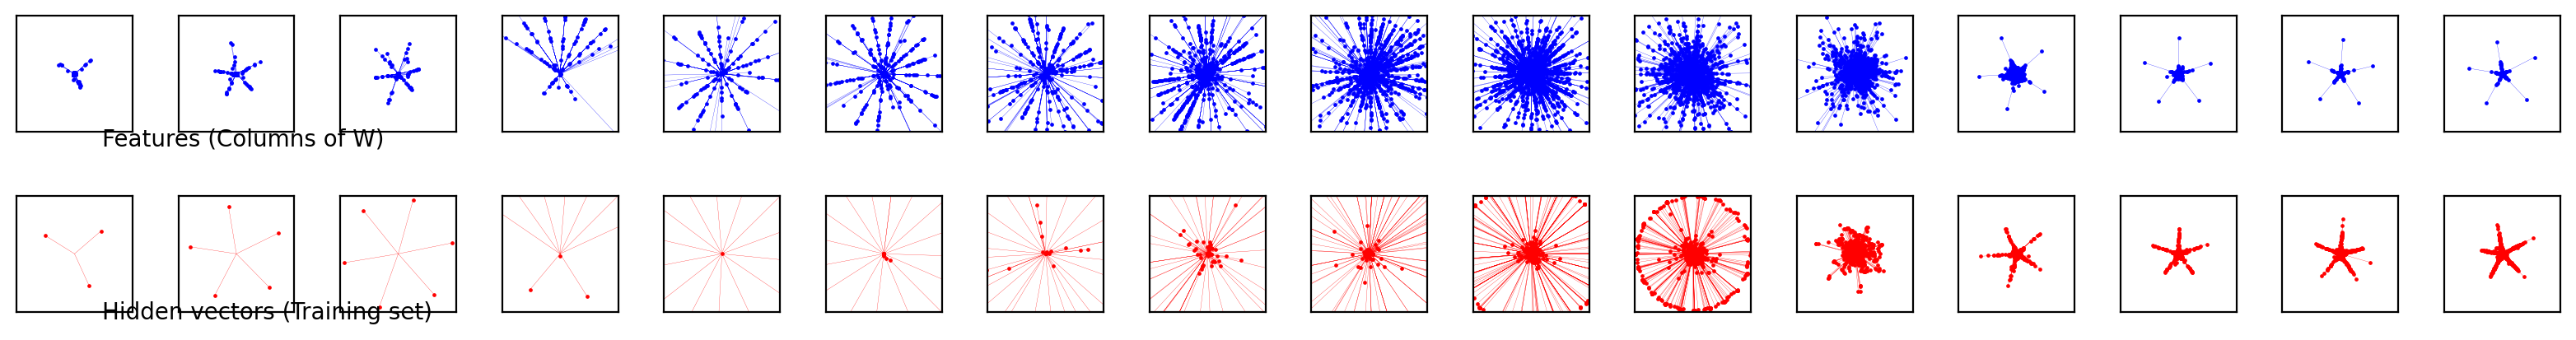

In [6]:
draw_mini_plots(T)

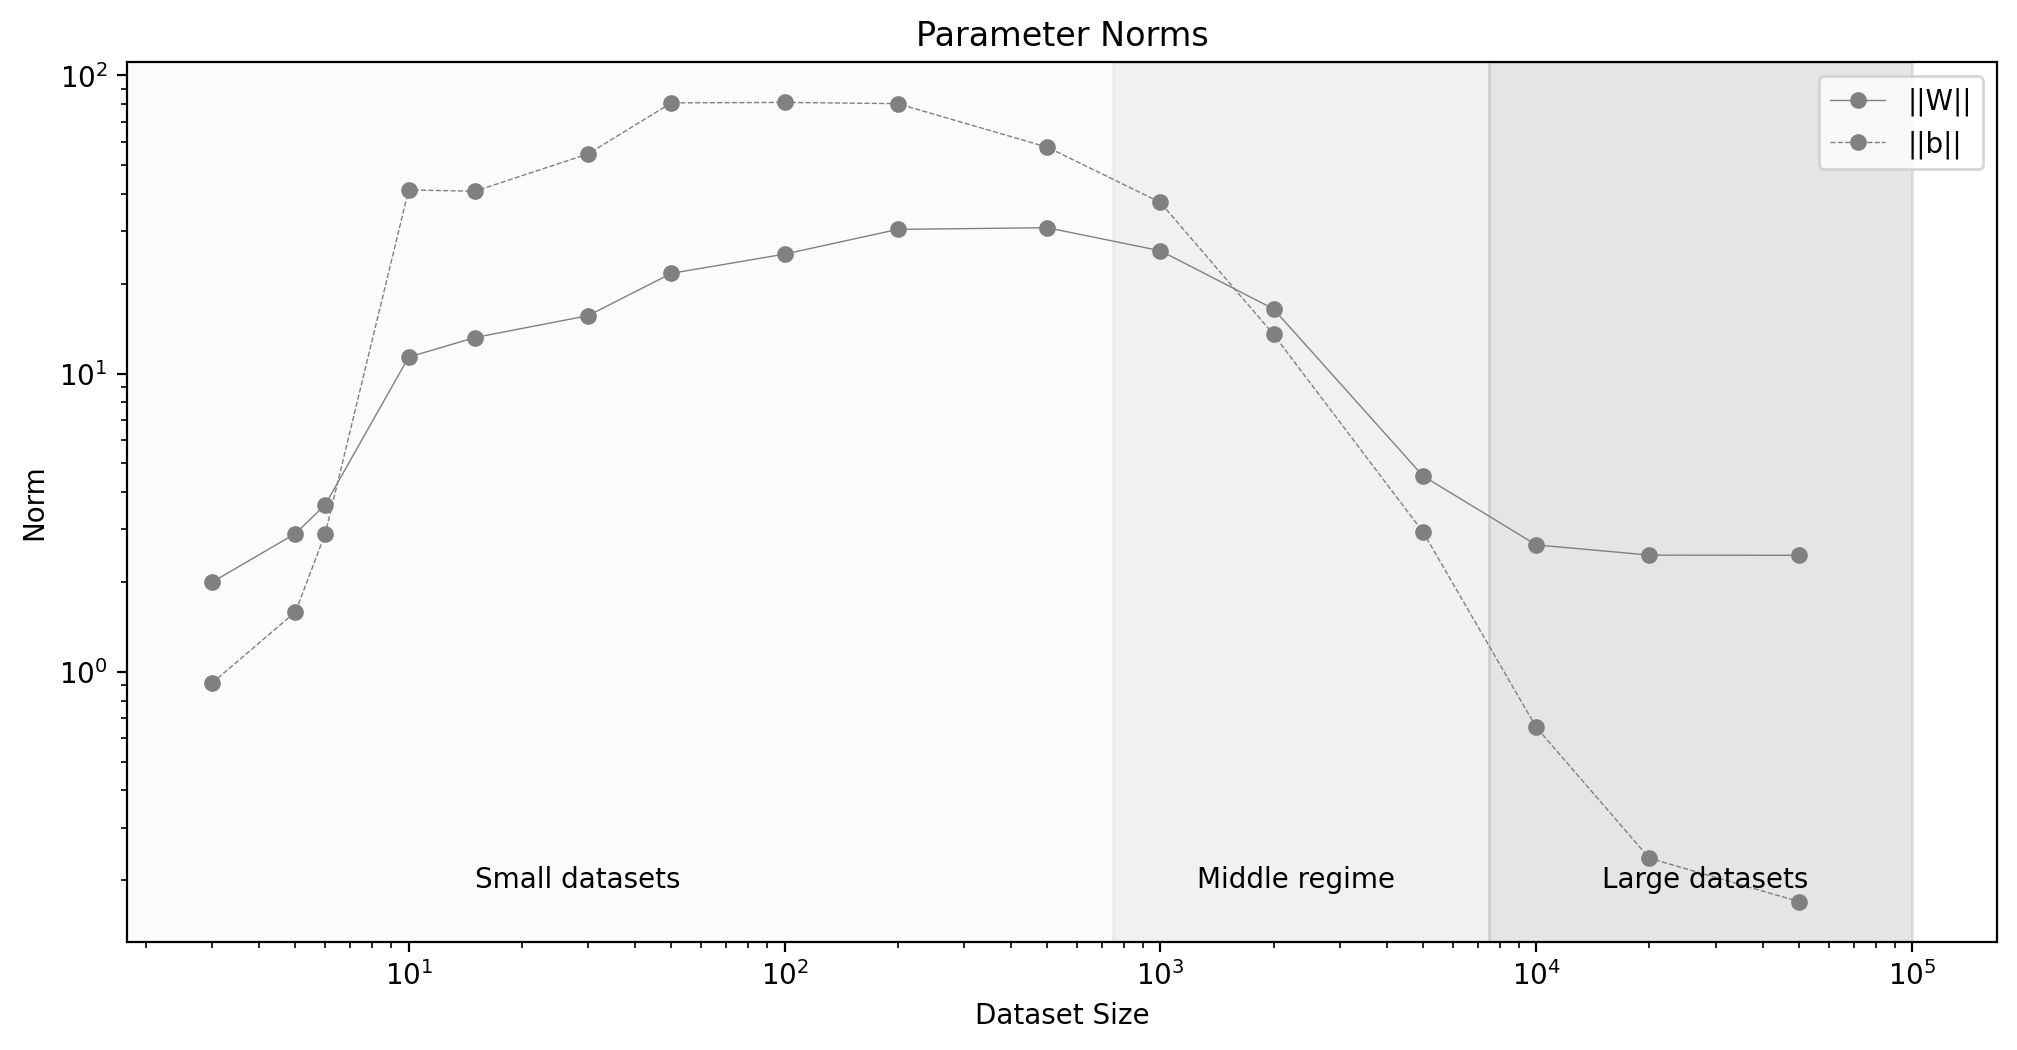

In [13]:
visualize_norms(T, path="../checkpoints")

Поведение норм похоже на то, что было приведено в статье.

Нормы смещения меньше норм весов матрицы для небольших наборов данных, становятся больше при средних размерах датасетов, и, затем резко убывают в режиме обобщения. Из-за отсутствия ресурсов мне не удалось воспроизвести поведение выхода на плато для норм смещений, но общая динамика совпадает с тем, что в статье.

Максимум нормы достигается в районе $10^2$, что тоже согласуется со статьей.